In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url='https://books.toscrape.com/'
response=requests.get(url)

In [ ]:
response=response.content

In [ ]:
soup=BeautifulSoup(response)

In [ ]:
ol=soup.find('ol')

In [ ]:
articles=ol.find_all('article',class_='product_pod')

In [ ]:
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [ ]:
books=[]


for article in articles:
  image=article.find('img')
  title=image.attrs['alt']
  star=article.find('p')
  star=star['class'][1]
  price=article.find('p',class_='price_color').text
  price=float(price[1:])
  books.append([title,price,star])

print(books)

[['A Light in the Attic', 51.77, 'Three'], ['Tipping the Velvet', 53.74, 'One'], ['Soumission', 50.1, 'One'], ['Sharp Objects', 47.82, 'Four'], ['Sapiens: A Brief History of Humankind', 54.23, 'Five'], ['The Requiem Red', 22.65, 'One'], ['The Dirty Little Secrets of Getting Your Dream Job', 33.34, 'Four'], ['The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 17.93, 'Three'], ['The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 22.6, 'Four'], ['The Black Maria', 52.15, 'One'], ['Starving Hearts (Triangular Trade Trilogy, #1)', 13.99, 'Two'], ["Shakespeare's Sonnets", 20.66, 'Four'], ['Set Me Free', 17.46, 'Five'], ["Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 52.29, 'Five'], ['Rip it Up and Start Again', 35.02, 'Five'], ['Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 57.25, 'Three'], ['Olio', 23.88, 'One'], ['Mesaerion: The Best Science Fiction Storie

In [ ]:
books=[]
for i in range(1,51):
  url=f"https://books.toscrape.com/catalogue/page-{i}.html"
  response=requests.get(url)
  response=response.content
  soup=BeautifulSoup(response)
  ol=soup.find('ol')
  articles=ol.find_all('article',class_='product_pod')


  for article in articles:
    image=article.find('img')
    title=image.attrs['alt']
    star=article.find('p')
    star=star['class'][1]
    price=article.find('p',class_='price_color').text
    price=float(price[1:])
    books.append([title,price,star])

print(books)

[['A Light in the Attic', 51.77, 'Three'], ['Tipping the Velvet', 53.74, 'One'], ['Soumission', 50.1, 'One'], ['Sharp Objects', 47.82, 'Four'], ['Sapiens: A Brief History of Humankind', 54.23, 'Five'], ['The Requiem Red', 22.65, 'One'], ['The Dirty Little Secrets of Getting Your Dream Job', 33.34, 'Four'], ['The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 17.93, 'Three'], ['The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 22.6, 'Four'], ['The Black Maria', 52.15, 'One'], ['Starving Hearts (Triangular Trade Trilogy, #1)', 13.99, 'Two'], ["Shakespeare's Sonnets", 20.66, 'Four'], ['Set Me Free', 17.46, 'Five'], ["Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 52.29, 'Five'], ['Rip it Up and Start Again', 35.02, 'Five'], ['Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 57.25, 'Three'], ['Olio', 23.88, 'One'], ['Mesaerion: The Best Science Fiction Storie

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(books,columns=['Title','Price','Star-Rating'])
df

,Title,Price,Star-Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,1st to Die (Women's Murder Club #1),53.98,One


In [ ]:
df.to_csv('books.csv')

In [ ]:
data=pd.read_csv('books.csv')

In [ ]:
data

,Unnamed: 0,Title,Price,Star-Rating
0,0,A Light in the Attic,51.77,Three
1,1,Tipping the Velvet,53.74,One
2,2,Soumission,50.10,One
3,3,Sharp Objects,47.82,Four
4,4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,998,1st to Die (Women's Murder Club #1),53.98,One


In [ ]:
data.shape

(1000, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Price        1000 non-null   float64
 3   Star-Rating  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [ ]:
data['Unnamed: 0'].shape

(1000,)

In [ ]:
data.rename(columns={'Unnamed: 0':'Book_No'})

,Book_No,Title,Price,Star-Rating
0,0,A Light in the Attic,51.77,Three
1,1,Tipping the Velvet,53.74,One
2,2,Soumission,50.10,One
3,3,Sharp Objects,47.82,Four
4,4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,998,1st to Die (Women's Murder Club #1),53.98,One


In [ ]:
data.duplicated().sum()  # No duplicate

0

In [ ]:
star_rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
data['star_rating'] = data['Star-Rating'].map(star_rating_map)

In [ ]:
data

,Unnamed: 0,Title,Price,Star-Rating,star_rating
0,0,A Light in the Attic,51.77,Three,3
1,1,Tipping the Velvet,53.74,One,1
2,2,Soumission,50.10,One,1
3,3,Sharp Objects,47.82,Four,4
4,4,Sapiens: A Brief History of Humankind,54.23,Five,5
...,...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,1
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,4
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,5
998,998,1st to Die (Women's Murder Club #1),53.98,One,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_books = len(data)
avg_price = data['Price'].mean()
avg_rating = data['star_rating'].mean()
print(f"Number of books: {num_books}")
print(f"Average price: {avg_price}")
print(f"Average star rating: {avg_rating}")

Number of books: 1000
Average price: 35.07035
Average star rating: 2.923


In [ ]:
# Top Performing Books
top_rated_books = data.sort_values(by='star_rating', ascending=False).head(5)
top_priced_books = data.sort_values(by='Price', ascending=False).head(5)

print("Top Rated Books:")
print(top_rated_books[['Title', 'star_rating']])
print("\nTop Priced Books:")
print(top_priced_books[['Title', 'Price']])

Top Rated Books:
                                                 Title  star_rating
999                 1,000 Places to See Before You Die            5
560                     The Barefoot Contessa Cookbook            5
601                                The Darkest Corners            5
598       The False Prince (The Ascendance Trilogy #1)            5
592  The Mathews Men: Seven Brothers and the War Ag...            5

Top Priced Books:
                                  Title  Price
648  The Perfect Play (Play by Play #1)  59.99
617   Last One Home (New Beginnings #1)  59.98
860    Civilization and Its Discontents  59.95
560      The Barefoot Contessa Cookbook  59.92
366           The Diary of a Young Girl  59.90


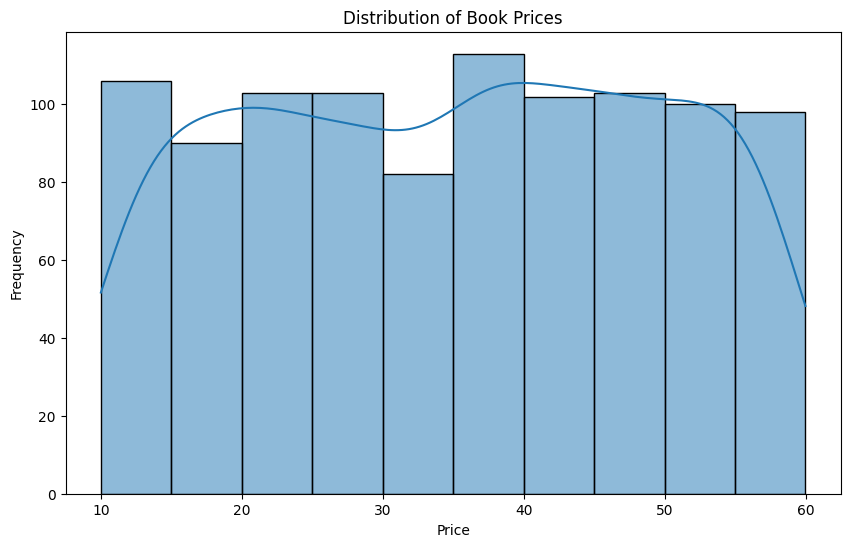

In [ ]:
# Price Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=10, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

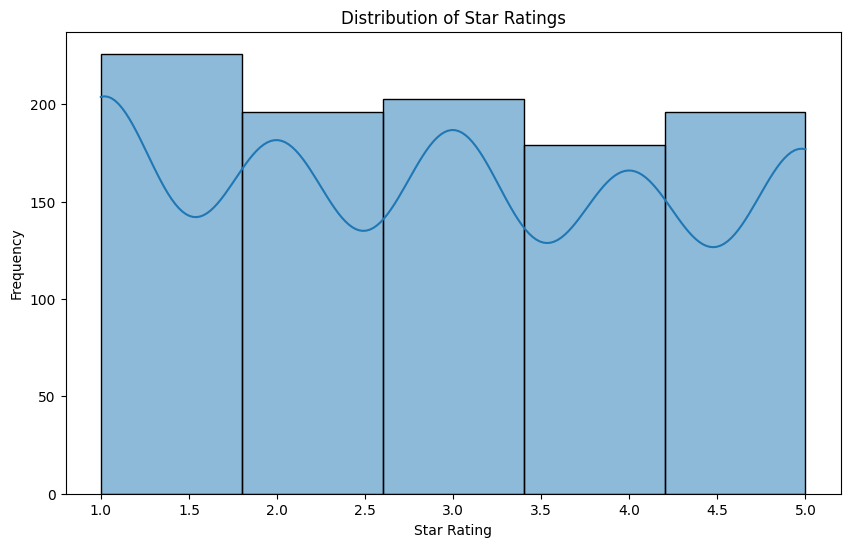

In [ ]:
# Rating Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['star_rating'], bins=5, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Correlation Analysis
correlation = data['Price'].corr(data['star_rating'])
print(f"Correlation between price and star rating: {correlation}")

Correlation between price and star rating: 0.028166239485873015


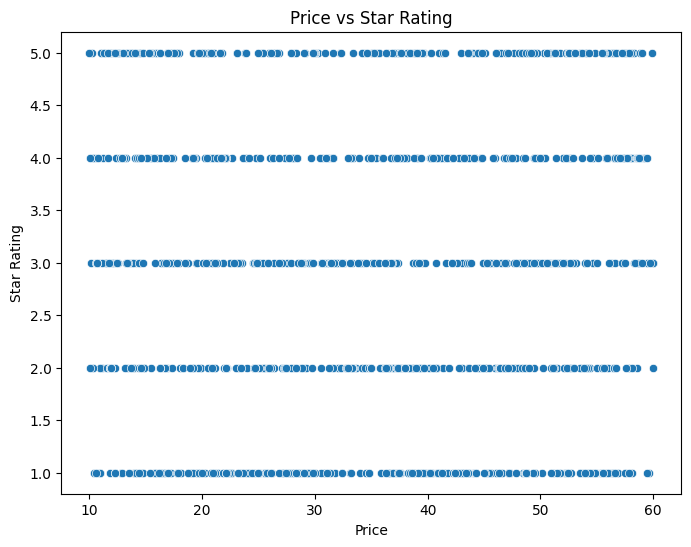

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='star_rating', data=data)
plt.title('Price vs Star Rating')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.show()